In [1]:
import pandas as pd

file_path = r"X:\Study\Projects\ML-Basics-Project\data\madrid.h5"

dfs = []
with pd.HDFStore(file_path, mode='r') as store:
    for key in store.keys():
        temp_df = store[key]
        temp_df['station_id'] = key  # Keep track of station
        dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
print(df.head())


     CO       NO_2        NOx        O_3        PM10  PM25  SO_2 station_id  \
0  0.37  58.400002  87.150002  34.529999  105.000000   NaN  6.34  /28079001   
1  0.42  65.760002  93.830002  27.930000   69.750000   NaN  7.15  /28079001   
2  0.32  61.090000  88.089996  32.070000   56.220001   NaN  6.26  /28079001   
3  0.23  47.020000  62.930000  42.209999   50.689999   NaN  5.19  /28079001   
4  0.19  47.169998  62.630001  48.459999   49.490002   NaN  5.03  /28079001   

   NO  BEN  ...  PXY  TCH  TOL  CH4  id  name  address  lon  lat elevation  
0 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
1 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
2 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
3 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
4 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  

[5 rows x 24 columns]


In [2]:
df.shape

(3808248, 24)

In [3]:
df.isnull().sum()

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
PM25          2991824
SO_2          1032288
station_id          0
NO            2275851
BEN           2766564
EBE           2806524
MXY           3492833
NMHC          2722936
OXY           3492553
PXY           3492664
TCH           2721807
TOL           2769319
CH4           3793398
id            3808224
name          3808224
address       3808224
lon           3808224
lat           3808224
elevation     3808224
dtype: int64

In [4]:
print("Before:", df.shape)
df_new = df.dropna(subset=["lat", "lon"])
print("After:", df_new.shape)

Before: (3808248, 24)
After: (24, 24)


In [5]:
df_air = df.drop(columns=['id','name','address','lon','lat','elevation',
           'OXY','PXY','TCH','TOL','CH4','PM25', 'NO', 'BEN', 'EBE', 'MXY', 'NMHC'])

In [6]:
print(df_air.shape)
df=df_air
df.head()

(3808248, 7)


,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
0,0.37,58.400002,87.150002,34.529999,105.000000,6.34,/28079001
1,0.42,65.760002,93.830002,27.930000,69.750000,7.15,/28079001
2,0.32,61.090000,88.089996,32.070000,56.220001,6.26,/28079001
3,0.23,47.020000,62.930000,42.209999,50.689999,5.19,/28079001
4,0.19,47.169998,62.630001,48.459999,49.490002,5.03,/28079001


In [7]:
df.describe()

,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.651012e+06,3.787050e+06,2.376275e+06,2.991732e+06,2.861255e+06,2.775960e+06
mean,5.503838e-01,5.047151e+01,1.093188e+02,3.982616e+01,2.893654e+01,1.065539e+01
std,5.354483e-01,3.455288e+01,1.102871e+02,3.039249e+01,2.594859e+01,9.121267e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.600000e-01,2.400000e+01,4.000000e+01,1.271000e+01,1.150000e+01,5.840000e+00
50%,4.000000e-01,4.400000e+01,7.615000e+01,3.486000e+01,2.149000e+01,8.150000e+00
75%,6.500000e-01,6.958000e+01,1.397000e+02,5.999000e+01,3.775000e+01,1.230000e+01
max,1.804000e+01,6.286000e+02,2.537000e+03,2.360000e+02,6.950000e+02,1.991000e+02


In [8]:
print(df.isnull().sum())
df.shape

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
SO_2          1032288
station_id          0
dtype: int64


(3808248, 7)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

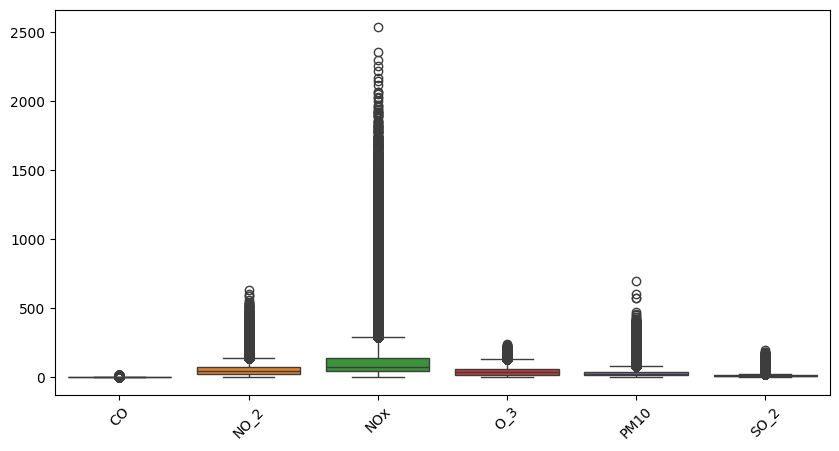

In [10]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [11]:
df = df[~(df[pollutant_cols] == 0).any(axis=1)]
(df == 0).sum()

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64

In [12]:
#outliers remove ke chakkkar mein pura data udd raha h . Thus , capped
def cap(df,col):
    q1 = df[col].quantile(0.20)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

for col in pollutant_cols:
    df = cap(df,col)

#softening the effect of cap
for col in pollutant_cols:
    df[col]=np.log1p(df[col])

C:\Users\upman\AppData\Local\Temp\ipykernel_3756\2778888532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_3756\2778888532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_3756\2778888532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

<function matplotlib.pyplot.show(close=None, block=None)>

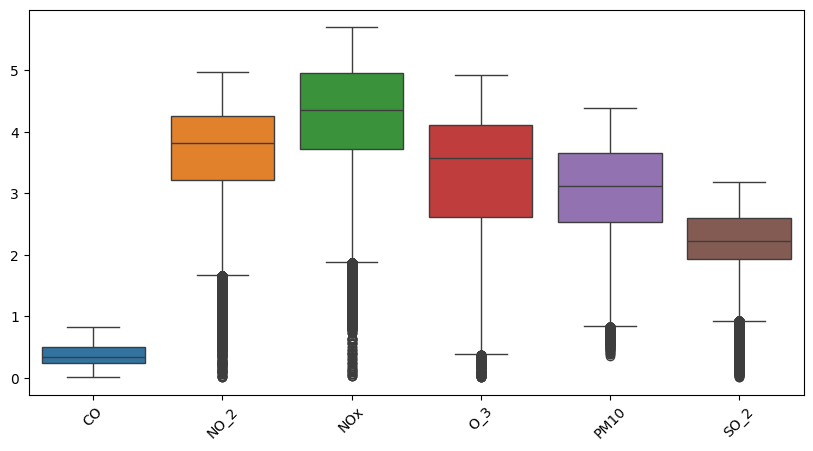

In [13]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [14]:
from scipy.stats import skew

skewness_value = skew(df[pollutant_cols].dropna())
print(skewness_value)
print(pollutant_cols)

[ 0.52024897 -0.8413864  -0.39124077 -0.42563283 -0.35578448  0.03956816]
['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2']


In [15]:
# If skewness |value| < 0.5 → data roughly symmetric
# 👉 use Mean imputation

# If skewness > 0.5 (right-skewed)
# 👉 use Median or log-transform + mean (median better, kyunki outliers ka effect kam hota hai)

# If skewness < -0.5 (left-skewed)
# 👉 use Median (again safer, since mean distort ho sakta hai)

df['CO'].fillna(df['CO'].median(), inplace=True)
df['NO_2'].fillna(df['NO_2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['O_3'].fillna(df['O_3'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace=True)

C:\Users\upman\AppData\Local\Temp\ipykernel_3756\3070033132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppData\Local\Temp\ipykernel_3756\3070033132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppDat

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64
         CO      NO_2       NOx       O_3      PM10      SO_2 station_id
0  0.314811  4.084294  4.479040  3.570377  4.389437  1.993339  /28079001
1  0.350657  4.201104  4.552086  3.364879  4.259153  2.098018  /28079001
2  0.277632  4.128585  4.489647  3.498627  4.046904  1.982380  /28079001
3  0.207014  3.871618  4.157789  3.766072  3.945264  1.822935  /28079001
4  0.173953  3.874736  4.153085  3.901164  3.921775  1.796747  /28079001
(3801770, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

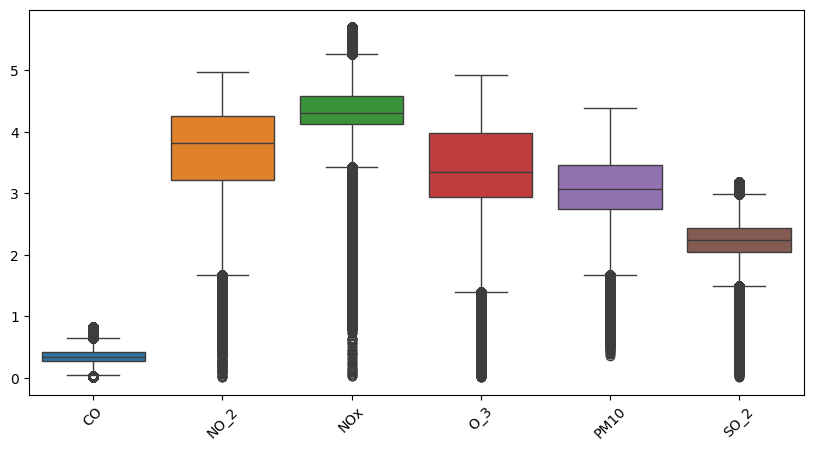

In [16]:
print(df.isnull().sum())
print(df.head())
print(df.shape)
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

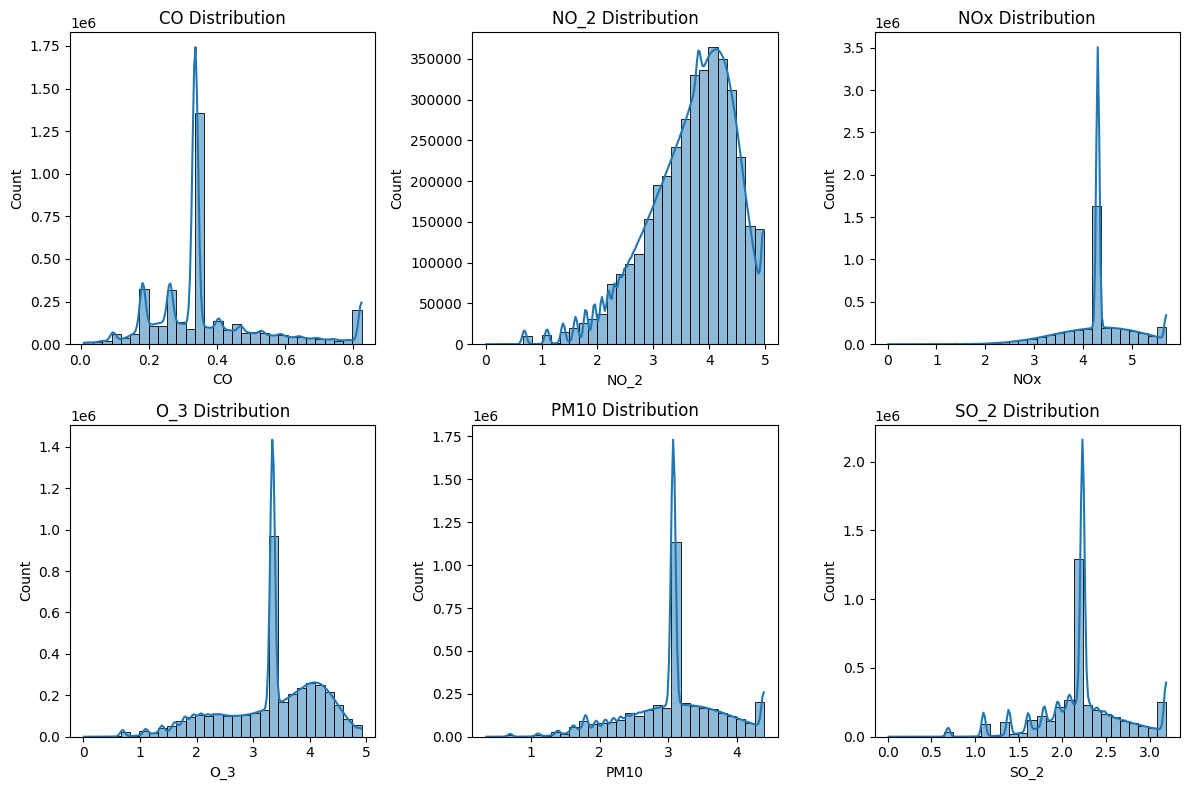

In [17]:

plt.figure(figsize=(12,8))
i = 1 

for col in pollutant_cols:
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"{col} Distribution")
    i += 1 

plt.tight_layout()
plt.show()

In [18]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())
master_data=df

876677
0


In [19]:
# station-level representation
station_summary = df.groupby("station_id").agg(
    mean_PM10=("PM10", "mean"),
    median_PM10=("PM10", "median"),         #tell us the typical pollution level & variability of that station.
    std_PM10=("PM10", "std"),
    min_PM10=("PM10", "min"),
    max_PM10=("PM10", "max"),
    p10_PM10=("PM10", lambda x: x.quantile(0.1)), 
    p90_PM10=("PM10", lambda x: x.quantile(0.9)),
    sample_count_PM10=("PM10", "count")
).reset_index()
station_summary.head()

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10
0,/28079001,3.368830,3.461979,0.709341,0.570980,4.389437,2.358020,4.276388,70976
1,/28079003,3.180066,3.129607,0.716874,0.385262,4.389437,2.149434,4.142500,86508
2,/28079004,3.076802,3.069917,0.706906,0.615186,4.389437,2.028148,4.059408,99790
3,/28079006,3.403056,3.486457,0.693826,0.559616,4.389437,2.430978,4.298917,74088
4,/28079007,3.157132,3.218075,0.751428,0.542324,4.389437,2.063058,4.135806,75733


In [20]:
q1 = station_summary["median_PM10"].quantile(0.33)
q2 = station_summary["median_PM10"].quantile(0.66)

def pollution_flag(score):
    if score <= q1:
        return "very good"
    elif score <= q2:
        return "okay"
    else:
        return "bad"

station_summary["sensor_health"] = station_summary["median_PM10"].apply(pollution_flag)
station_summary.sample(10)

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10,sensor_health
38,/28079099,3.243165,3.260018,0.657756,1.324419,4.389437,2.343727,4.139955,87470,bad
31,/28079054,3.069917,3.069917,0.000000,3.069917,3.069917,3.069917,3.069917,21996,very good
4,/28079007,3.157132,3.218075,0.751428,0.542324,4.389437,2.063058,4.135806,75733,bad
9,/28079014,3.307004,3.382015,0.760833,0.582216,4.389437,2.203869,4.340814,77671,bad
5,/28079008,3.081130,3.091042,0.730689,0.530628,4.389437,2.079442,4.041295,138139,okay
27,/28079047,3.037043,3.091042,0.745179,0.693147,4.389437,2.069391,3.977736,20365,okay
3,/28079006,3.403056,3.486457,0.693826,0.559616,4.389437,2.430978,4.298917,74088,bad
1,/28079003,3.180066,3.129607,0.716874,0.385262,4.389437,2.149434,4.142500,86508,bad
17,/28079023,3.157966,3.069917,0.722934,0.343590,4.389437,2.136530,4.175878,78154,very good
18,/28079024,2.910314,2.944439,0.719198,0.457425,4.389437,1.945910,3.844386,143998,very good


In [21]:
df.sample(6)

,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
535543,0.336472,4.369448,4.304246,3.583519,2.833213,2.079442,/28079008
2476051,0.824175,4.671894,5.112590,4.092510,3.423285,3.188210,/28079038
2394892,0.262364,4.564348,4.304246,3.341783,3.433987,2.079442,/28079036
183379,0.285179,3.778492,4.001315,4.268998,1.791759,2.076938,/28079004
2484733,0.336472,3.533395,3.990279,3.341783,2.497329,2.234306,/28079038
3030118,0.336472,4.330733,4.304246,3.341783,3.555348,2.231640,/28079048


In [24]:
print(df.shape)
df.describe()

(2925093, 7)


,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.925093e+06,2.925093e+06,2.925093e+06,2.925093e+06,2.925093e+06,2.925093e+06
mean,3.840215e-01,3.808213e+00,4.304837e+00,3.307757e+00,3.114281e+00,2.270682e+00
std,1.865268e-01,7.077215e-01,7.610495e-01,8.809142e-01,7.239576e-01,4.928059e-01
min,9.950331e-03,9.950331e-03,1.980263e-02,9.950331e-03,3.435897e-01,9.950331e-03
25%,2.623643e-01,3.400530e+00,3.892024e+00,2.728506e+00,2.708050e+00,2.016235e+00
50%,3.364722e-01,3.924742e+00,4.304246e+00,3.341783e+00,3.069917e+00,2.231640e+00
75%,4.700036e-01,4.325985e+00,4.787492e+00,3.991019e+00,3.617115e+00,2.556452e+00
max,8.241754e-01,4.977595e+00,5.701847e+00,4.913463e+00,4.389437e+00,3.188210e+00


In [ ]:
#Feature Enginnering for regression
df_reg = df.copy()
# Vehicles → NOx, CO, some SO₂, + PM10 directly.
# Industries → SO₂, NOx, + PM10 directly.
# PM10 → dono ka combined impact + extra dust sources.
df_reg["station_code"] = df_reg["station_id"].astype("category").cat.codes
df_reg["CO_m_NOx"]  = df_reg["CO"]  - df_reg["NOx"]
df_reg["NO2_m_NOx"] = df_reg["NO_2"]- df_reg["NOx"]
df_reg["O3_m_NOx"]  = df_reg["O_3"] - df_reg["NOx"]
df_reg["SO2_m_NOx"] = df_reg["SO_2"]- df_reg["NOx"]
#NOx dono mein common he 
#NOx ek traffic-related pollutant hai, aur PM10 bhi mostly traffic + dust sources se linked hota hai. 
#Agar tum bas raw pollutants lete ho (CO, NO₂, O₃, SO₂, NOx), toh model ko relation dhoondhna thoda “spread out” hoga.
df_reg.sample(6)


,CO,NO_2,NOx,O_3,PM10,SO_2,station_id,station_code,CO_m_PM10,NO2_m_PM10,O3_m_PM10,SO2_m_PM10
486720,0.530628,4.624973,4.304246,3.332205,4.389437,1.945910,/28079008,5,-3.858808,0.235536,-1.057232,-2.443526
945574,0.350657,3.879706,4.373238,3.569251,4.345881,2.071913,/28079014,9,-3.995224,-0.466175,-0.776630,-2.273968
1020032,0.329304,4.405133,5.212760,2.644045,3.869324,2.653242,/28079015,10,-3.540021,0.535808,-1.225279,-1.216082
718130,0.095310,3.628067,3.758872,4.119037,2.952303,2.359910,/28079011,7,-2.856993,0.675765,1.166734,-0.592393
3719915,0.336472,2.890372,4.304246,4.060443,2.079442,2.231640,/28079060,37,-1.742969,0.810930,1.981001,0.152198
456554,0.307485,4.565701,4.677491,3.145875,2.278292,2.167910,/28079007,4,-1.970808,2.287409,0.867582,-0.110382


In [ ]:
#pollutants ke combination bana rahe ho jo research literature mein air-quality ke liye kaafi common hai.
df_reg["OX"] = np.log1p(np.expm1(df_reg["O_3"]) + np.expm1(df_reg["NO_2"]))   #OX index = O₃ + NO₂
#np.expm1() (reverse log) #Fir np.log1p() use karke dobara log-scale pe
df_reg["COMB"] = np.log1p(np.expm1(df_reg["CO"]) + np.expm1(df_reg["NOx"]) + np.expm1(df_reg["SO_2"]))
#CO, NOx, SO₂  # industrial+vehicle
df_reg.sample(6)

,CO,NO_2,NOx,O_3,PM10,SO_2,station_id,station_code,CO_m_PM10,NO2_m_PM10,O3_m_PM10,SO2_m_PM10,OX,COMB
2156456,0.336472,4.039888,4.448750,3.341783,3.353407,1.545433,/28079027,21,-3.016934,0.686482,-0.011623,-1.807974,4.431882,4.495467
2027134,0.336472,4.446643,5.035653,2.260721,2.498974,2.377693,/28079026,20,-2.162502,1.947669,-0.238253,-0.121281,4.542550,5.099744
1961676,0.165514,4.212572,4.487625,3.797061,3.780547,2.218116,/28079025,19,-3.615032,0.432025,0.016514,-1.562431,4.710431,4.577593
437259,0.392042,4.083789,4.414252,2.026832,2.840831,2.978586,/28079007,4,-2.448789,1.242958,-0.814000,0.137755,4.189048,4.622617
1194636,0.285179,3.341801,3.671988,4.195245,3.538057,2.445819,/28079016,11,-3.252878,-0.196255,0.657189,-1.092237,4.539458,3.916015
1107299,0.329304,3.743131,4.184033,3.941970,3.675794,3.001714,/28079016,11,-3.346490,0.067337,0.266176,-0.674080,4.529908,4.444297
